## 1. Importación de Librerías y Carga del Paquete

In [72]:
# Importar el paquete de minería desarrollado
from paquete_mineria import *
import warnings
warnings.filterwarnings('ignore')

# Librerías adicionales para análisis avanzados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

# Intentar importar UMAP (puede no estar disponible)
try:
    import umap.umap_ as umap
    UMAP_DISPONIBLE = True
    print("UMAP disponible")
except ImportError:
    UMAP_DISPONIBLE = False
    print("UMAP no disponible - se instalará en Docker")

print("Librerías cargadas exitosamente")

UMAP disponible
Librerías cargadas exitosamente


## 2. Carga y Exploración de Datos

In [50]:
# Cargar datos - ajustar según el dataset que quieras usar
# Opción 1: BankChurners.csv
#datos_path = "BankChurners.csv"

# Opción 2: hotel_bookings_muestra.csv
datos_path = "hotel_bookings_muestra.csv"

# Crear instancia del analizador
ade = AnalisisDatosExploratorio(datos_path, 1)  # 1 para CSV con comas
print(f"Datos cargados: {ade.df.shape}")
print(f"Columnas: {ade.df.columns.tolist()}")
ade.df.head()

2025-11-15 16:29:33,008 [INFO] Cargando datos desde hotel_bookings_muestra.csv con opciones {'sep': ',', 'decimal': '.', 'index_col': 0}


Datos cargados: (408, 20)
Columnas: ['hotel', 'is_canceled', 'lead_time', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status']


,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
16303,City Hotel,1,67,May,0,3,2,0,0,0,0,A,0,No Deposit,0,Transient-Party,120.0,0,0,Canceled
17344,City Hotel,1,224,June,0,2,2,0,0,0,0,A,0,No Deposit,0,Transient,107.1,0,1,Canceled
4890,Resort Hotel,0,76,January,1,3,2,0,0,0,0,A,0,No Deposit,0,Transient,37.8,0,3,Check-Out
11142,Resort Hotel,0,72,July,0,2,2,0,0,0,0,D,0,No Deposit,0,Transient,162.0,1,1,Check-Out
18700,City Hotel,1,229,July,1,4,2,0,0,0,0,A,0,Non Refund,0,Transient,110.0,0,0,Canceled


2025-11-15 16:29:33,052 [INFO] Dimensiones: (408, 20)
2025-11-15 16:29:33,057 [INFO] Primeras filas:
              hotel  is_canceled  lead_time arrival_date_month  \
16303    City Hotel            1         67                May   
17344    City Hotel            1        224               June   
4890   Resort Hotel            0         76            January   
11142  Resort Hotel            0         72               July   
18700    City Hotel            1        229               July   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
16303                        0                     3       2         0   
17344                        0                     2       2         0   
4890                         1                     3       2         0   
11142                        0                     2       2         0   
18700                        1                     4       2         0   

       babies  previous_cancellations  previous_bookings_

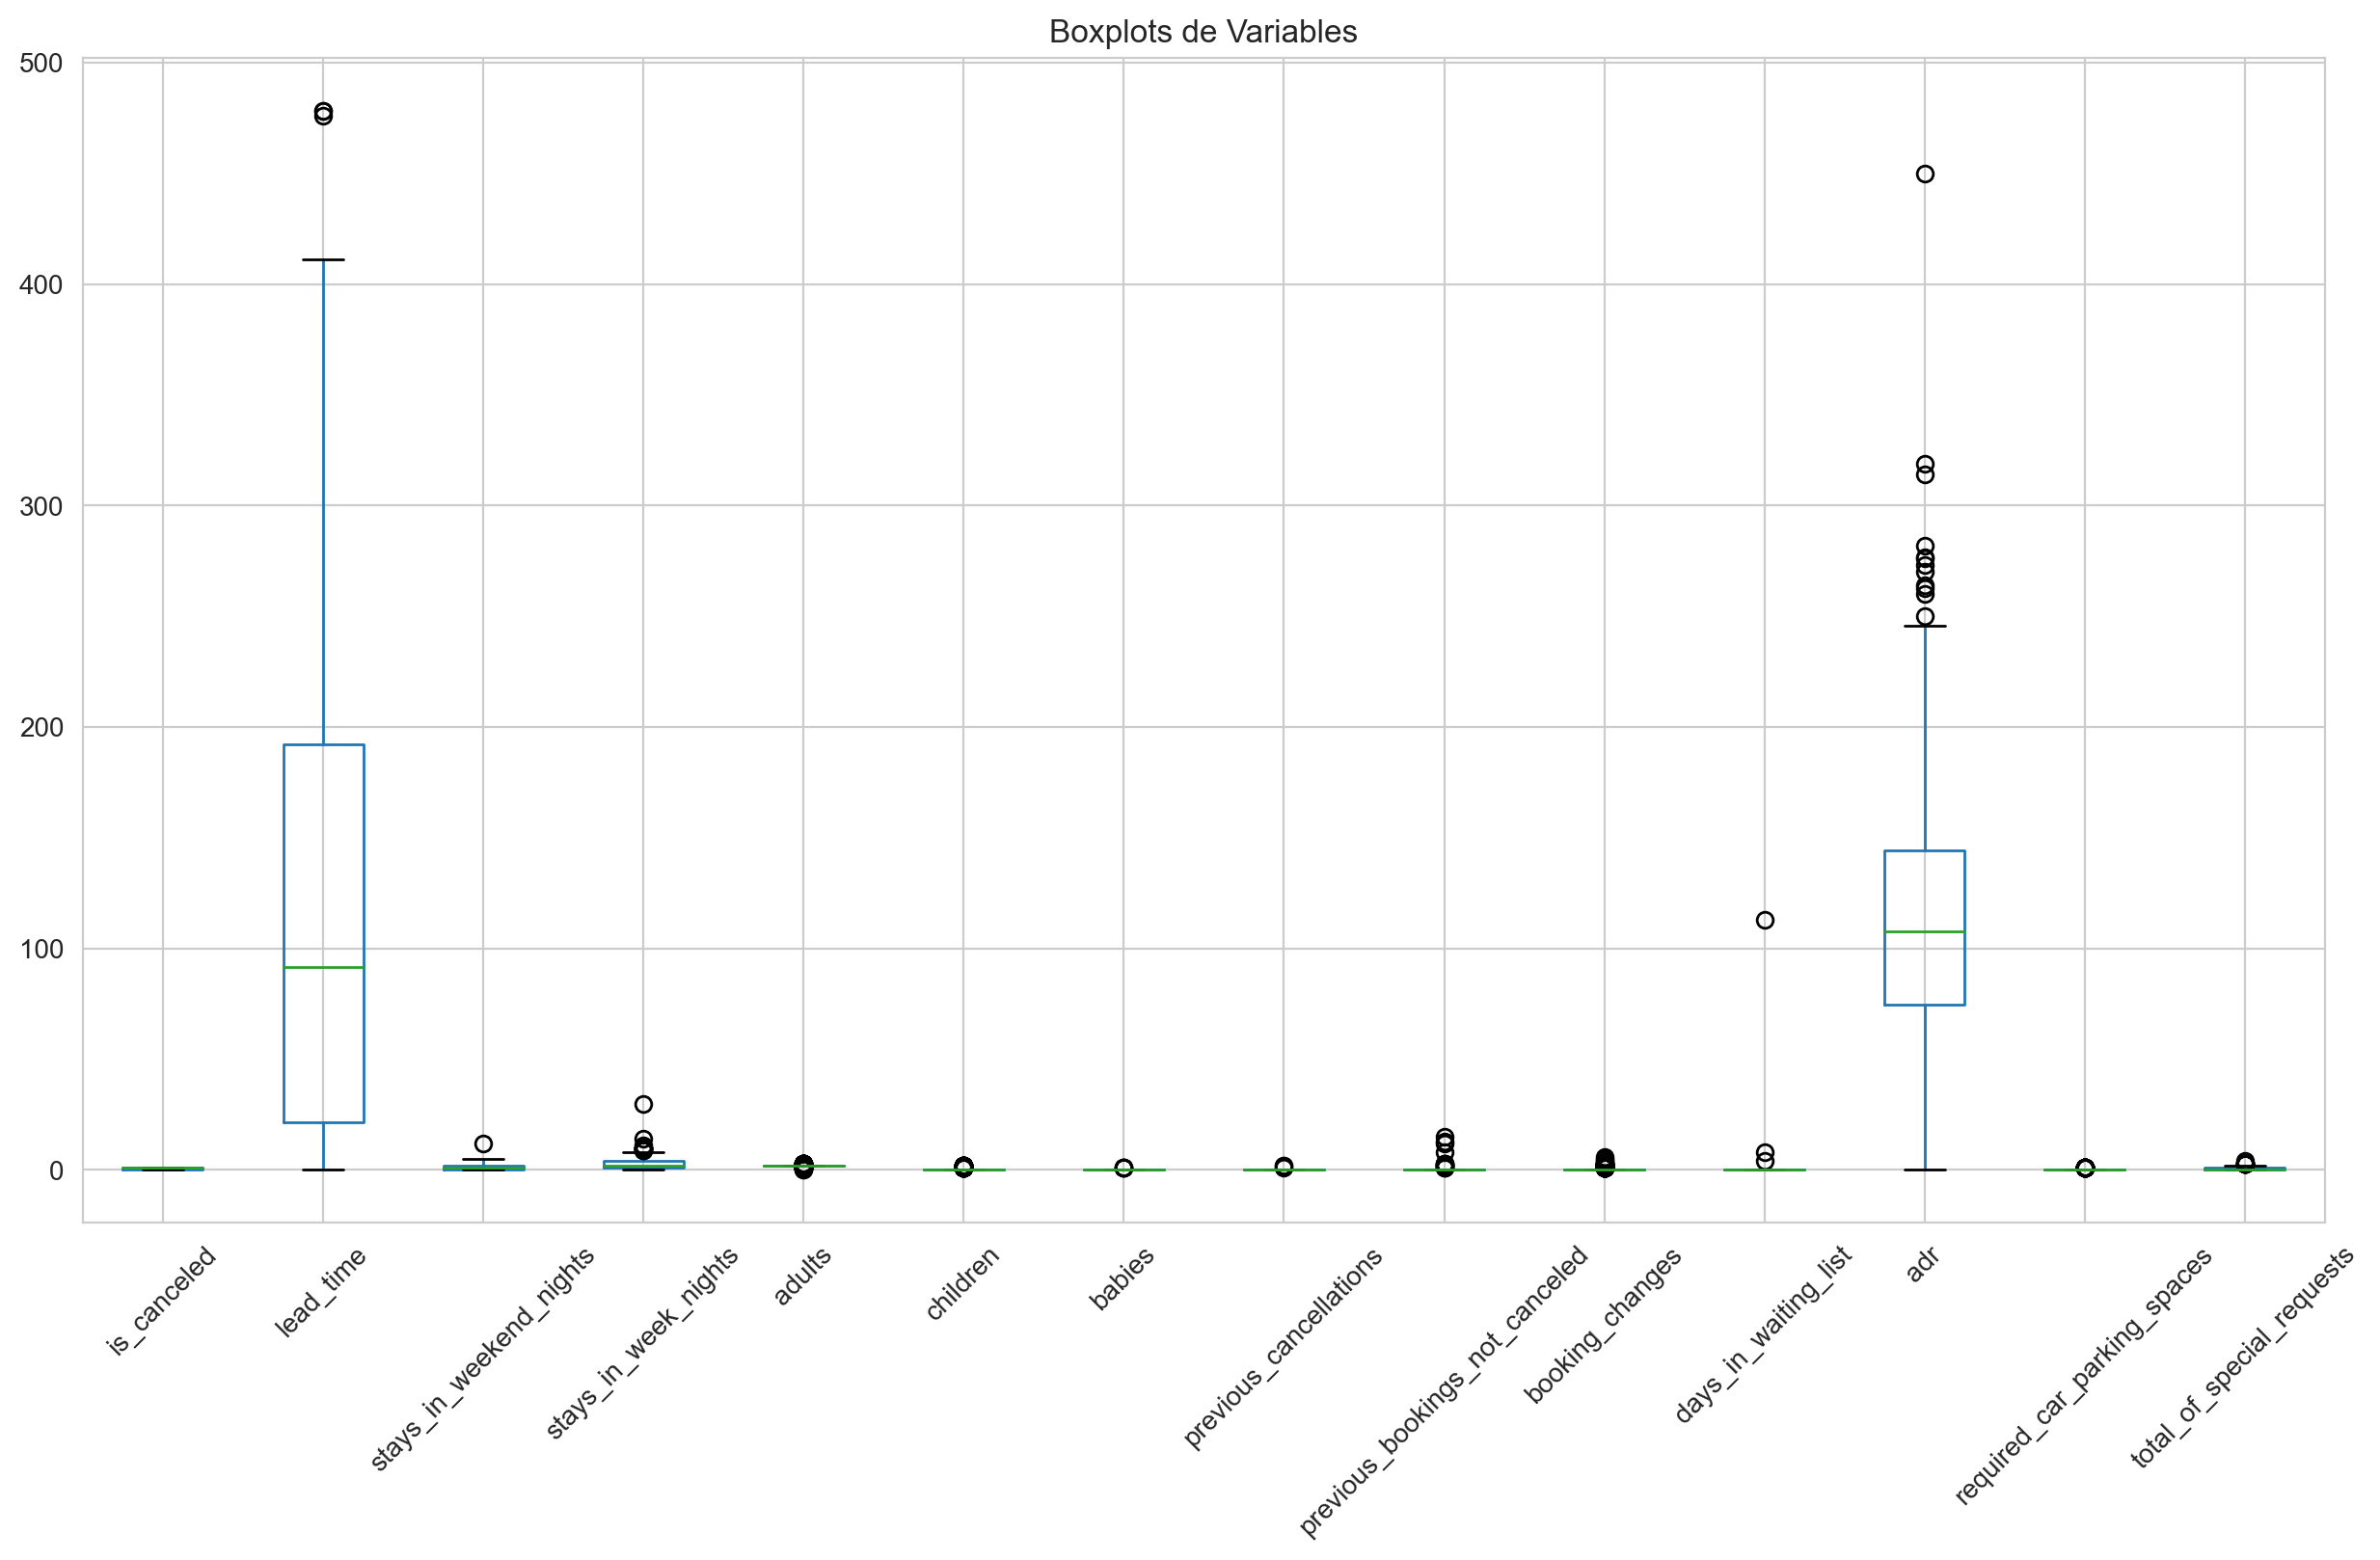

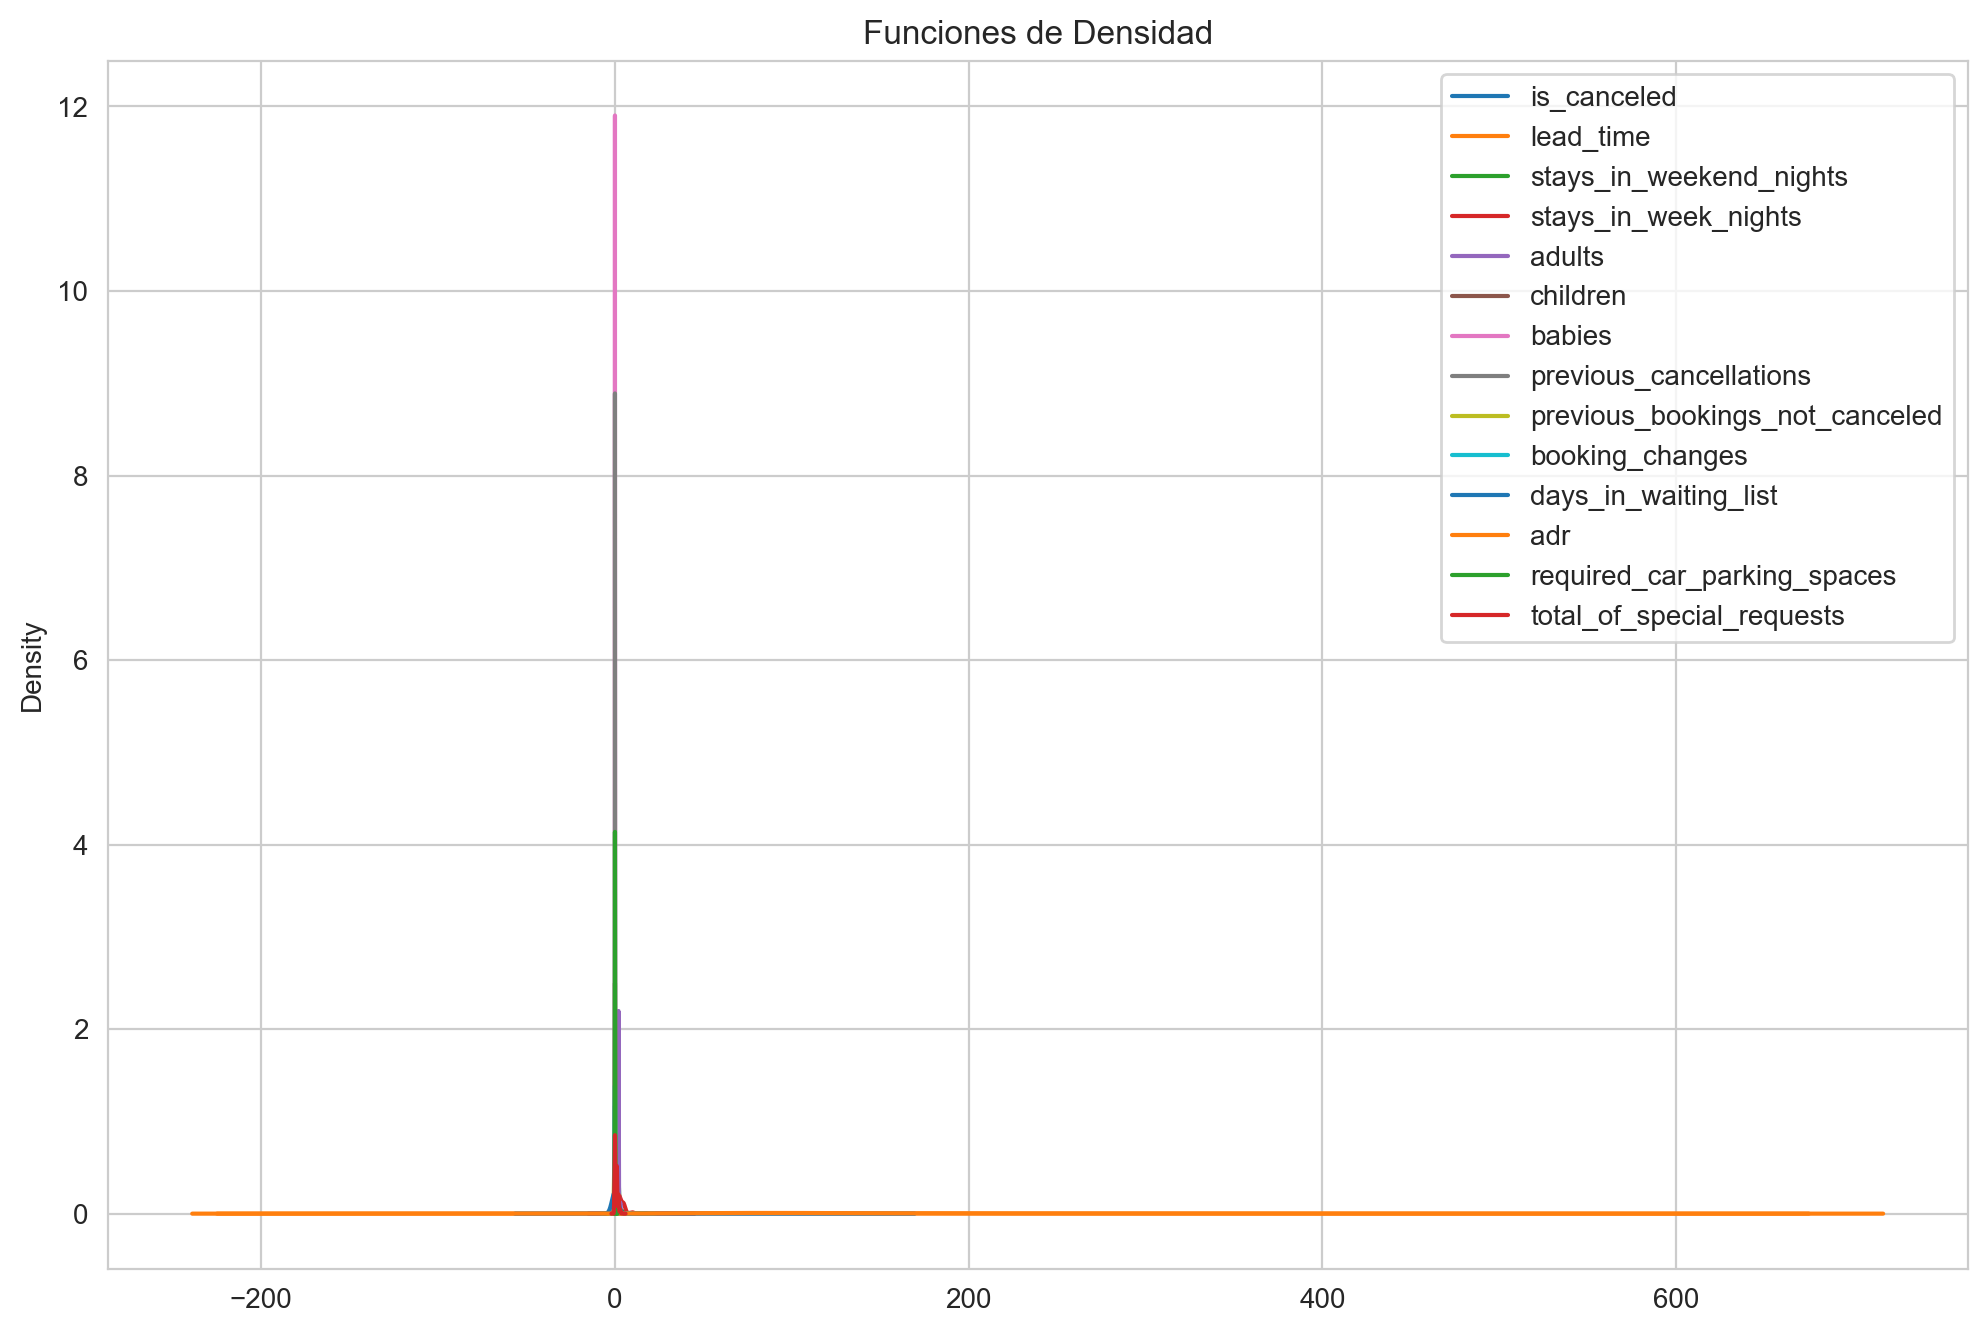

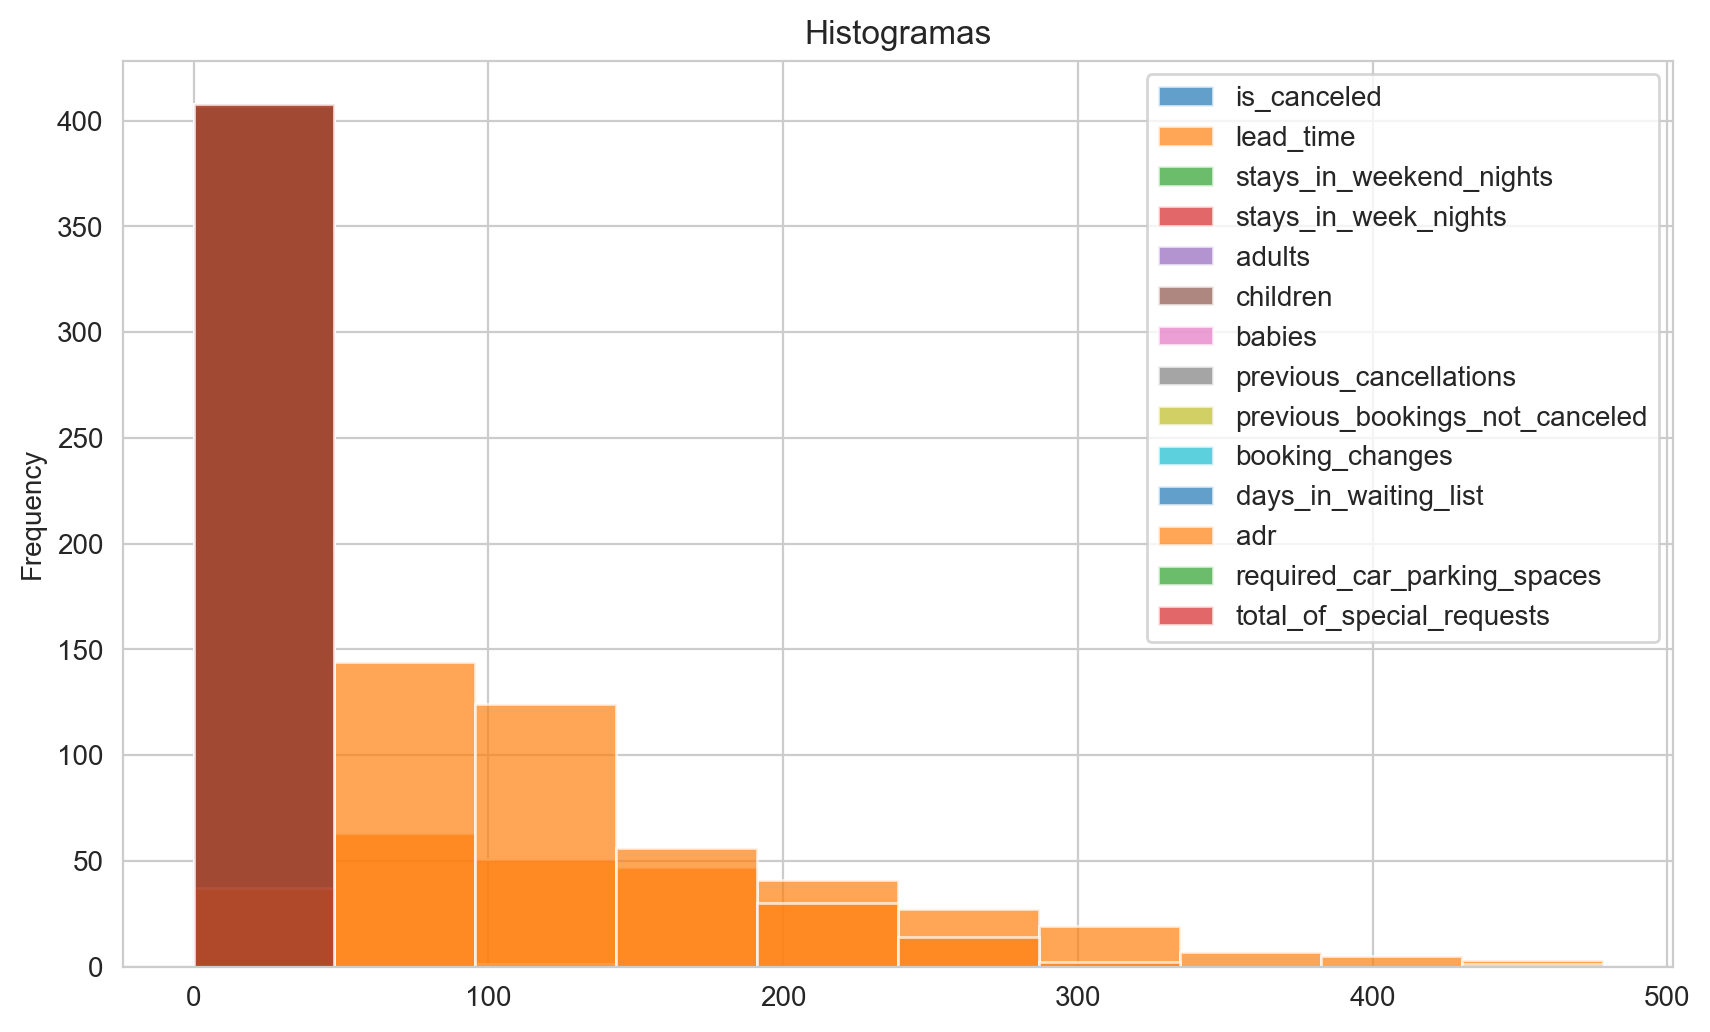

2025-11-15 16:29:34,841 [INFO] Matriz de Correlación:
                             is_canceled  lead_time  stays_in_weekend_nights  \
is_canceled                     1.000000   0.369226                -0.017654   
lead_time                       0.369226   1.000000                 0.312607   
stays_in_weekend_nights        -0.017654   0.312607                 1.000000   
stays_in_week_nights           -0.085044   0.302394                 0.671362   
adults                          0.093277   0.081089                 0.013483   
...                                  ...        ...                      ...   
booking_changes                -0.250835  -0.073202                 0.025895   
days_in_waiting_list           -0.062151   0.039326                -0.006906   
adr                             0.131970   0.067191                 0.020910   
required_car_parking_spaces    -0.364288  -0.197716                -0.080733   
total_of_special_requests      -0.107363  -0.009372               

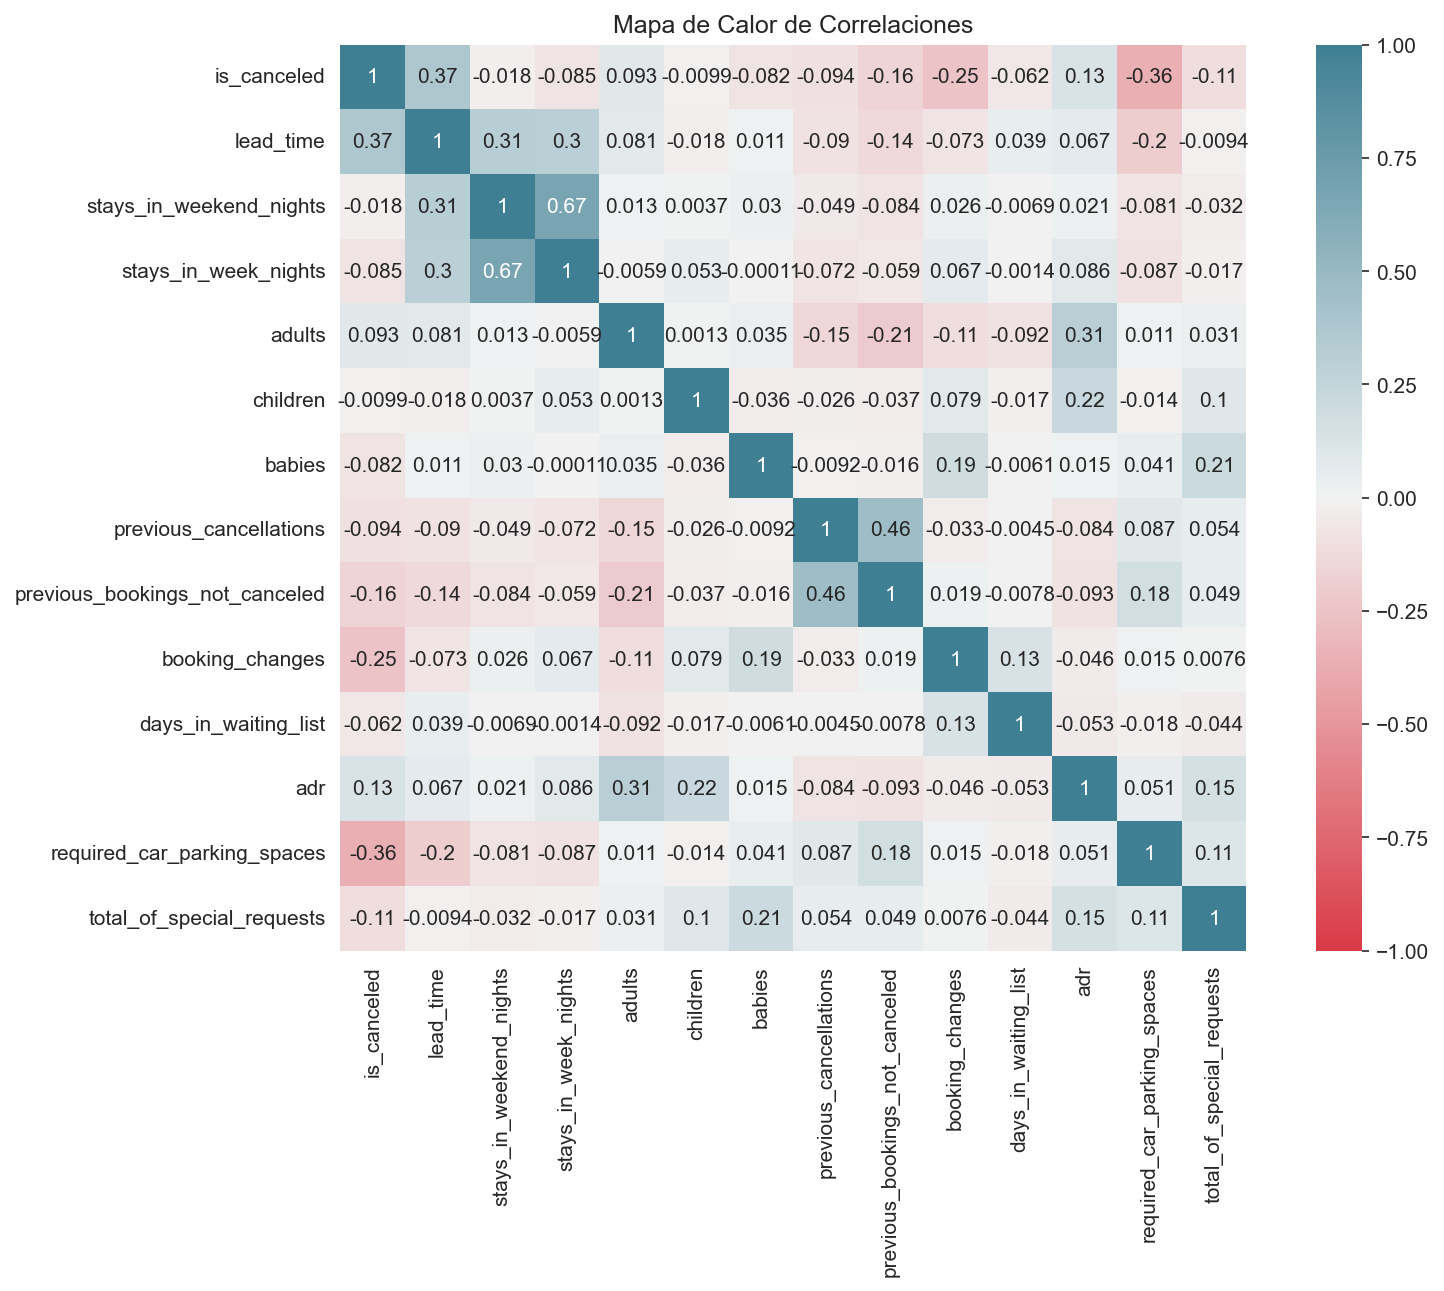

In [51]:
# Análisis exploratorio inicial
ade.analisis()

## 3. Preparación de Datos para Análisis No Supervisado

In [52]:
# Seleccionar solo variables numéricas y limpiar datos
df_numerico = ade.df.select_dtypes(include=[np.number]).dropna()
print(f"Datos numéricos limpios: {df_numerico.shape}")
print(f"Columnas numéricas: {df_numerico.columns.tolist()}")

# Estandarizar los datos
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(df_numerico)
datos_escalados_df = pd.DataFrame(datos_escalados, 
                                 columns=df_numerico.columns, 
                                 index=df_numerico.index)

print("Datos estandarizados preparados para análisis")
datos_escalados_df.describe()

Datos numéricos limpios: (408, 14)
Columnas numéricas: ['is_canceled', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
Datos estandarizados preparados para análisis


,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,4.080000e+02,4.080000e+02,4.080000e+02,4.080000e+02,4.080000e+02,4.080000e+02,4.080000e+02,4.080000e+02,4.080000e+02,4.080000e+02,4.080000e+02,4.080000e+02,4.080000e+02,4.080000e+02
mean,8.707632e-18,-3.918434e-17,5.442270e-17,2.394599e-17,-1.458528e-16,7.836868e-17,-1.088454e-17,-3.265362e-18,-4.244970e-17,-2.503444e-17,-5.224579e-17,5.224579e-17,-1.959217e-17,5.659961e-17
std,1.001228e+00,1.001228e+00,1.001228e+00,1.001228e+00,1.001228e+00,1.001228e+00,1.001228e+00,1.001228e+00,1.001228e+00,1.001228e+00,1.001228e+00,1.001228e+00,1.001228e+00,1.001228e+00
min,-1.136721e+00,-1.107680e+00,-9.287108e-01,-1.185961e+00,-3.963388e+00,-3.190118e-01,-1.113865e-01,-8.279462e-02,-1.419796e-01,-3.939965e-01,-5.467559e-02,-1.931203e+00,-3.204726e-01,-8.120071e-01
25%,-1.136721e+00,-9.041742e-01,-9.287108e-01,-7.909633e-01,3.145546e-01,-3.190118e-01,-1.113865e-01,-8.279462e-02,-1.419796e-01,-3.939965e-01,-5.467559e-02,-6.830566e-01,-3.204726e-01,-8.120071e-01
50%,8.797233e-01,-2.515506e-01,-7.143929e-02,-3.959657e-01,3.145546e-01,-3.190118e-01,-1.113865e-01,-8.279462e-02,-1.419796e-01,-3.939965e-01,-5.467559e-02,-1.334511e-01,-3.204726e-01,-8.120071e-01
75%,8.797233e-01,6.887887e-01,7.858322e-01,3.940295e-01,3.145546e-01,-3.190118e-01,-1.113865e-01,-8.279462e-02,-1.419796e-01,-3.939965e-01,-5.467559e-02,4.791718e-01,-3.204726e-01,4.104981e-01
max,8.797233e-01,3.364779e+00,9.358547e+00,1.066397e+01,2.453526e+00,3.879595e+00,8.977750e+00,1.342929e+01,1.176096e+01,7.322030e+00,2.011143e+01,5.590770e+00,3.120391e+00,4.078014e+00


# A. Análisis de Componentes Principales (PCA)

## A.1 PCA con Configuración Estándar

=== PCA ESTÁNDAR (2 componentes) ===
Varianza explicada por componentes: [0.15693948 0.12162636]
Varianza explicada acumulada: [0.15693948 0.27856584]


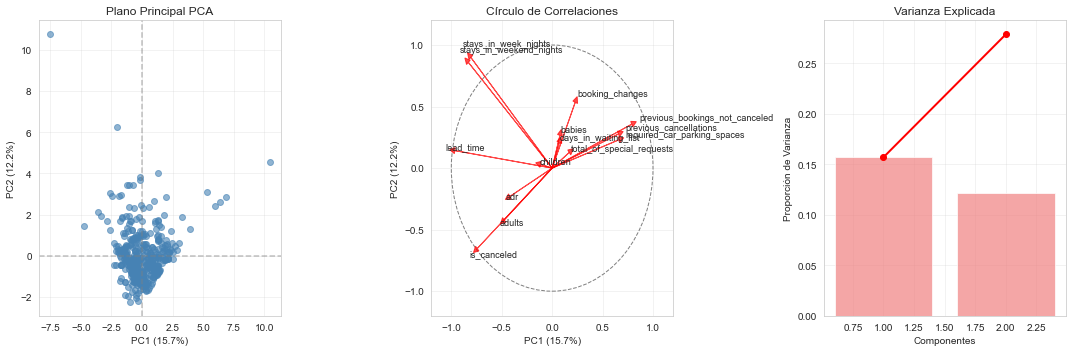

In [53]:
# PCA estándar con 2 componentes 
print("=== PCA ESTÁNDAR (2 componentes) ===")

from sklearn.decomposition import PCA

pca_2_comp = PCA(n_components=2)
coordenadas_pca = pca_2_comp.fit_transform(datos_escalados_df)
var_explicada = pca_2_comp.explained_variance_ratio_

print(f"Varianza explicada por componentes: {var_explicada}")
print(f"Varianza explicada acumulada: {np.cumsum(var_explicada)}")

plt.figure(figsize=(15, 5))

# 1. Plano principal
plt.subplot(1, 3, 1)
plt.scatter(coordenadas_pca[:, 0], coordenadas_pca[:, 1], alpha=0.6, color='steelblue')
plt.title('Plano Principal PCA')
plt.xlabel(f'PC1 ({var_explicada[0]:.1%})')
plt.ylabel(f'PC2 ({var_explicada[1]:.1%})')
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)

# 2. Círculo de correlaciones
plt.subplot(1, 3, 2)
correlaciones = np.corrcoef(datos_escalados_df.T) @ pca_2_comp.components_.T
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--')
plt.gca().add_patch(circle)

for i, col in enumerate(datos_escalados_df.columns):
    plt.arrow(0, 0, correlaciones[i, 0], correlaciones[i, 1], 
              head_width=0.05, head_length=0.05, fc='red', ec='red', alpha=0.7)
    plt.text(correlaciones[i, 0]*1.1, correlaciones[i, 1]*1.1, col, fontsize=9)

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.title('Círculo de Correlaciones')
plt.xlabel(f'PC1 ({var_explicada[0]:.1%})')
plt.ylabel(f'PC2 ({var_explicada[1]:.1%})')
plt.grid(True, alpha=0.3)

# 3. Varianza explicada
plt.subplot(1, 3, 3)
plt.bar(range(1, len(var_explicada)+1), var_explicada, alpha=0.7, color='lightcoral')
plt.plot(range(1, len(var_explicada)+1), np.cumsum(var_explicada), 'ro-', linewidth=2)
plt.title('Varianza Explicada')
plt.xlabel('Componentes')
plt.ylabel('Proporción de Varianza')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

class PCATemporal:
    def __init__(self, var_explicada, coordenadas, correlaciones):
        self.var_explicada = var_explicada
        self.coordenadas_ind = pd.DataFrame(coordenadas, columns=[f'PC{i+1}' for i in range(coordenadas.shape[1])])
        self.correlacion_var = pd.DataFrame(correlaciones, columns=[f'PC{i+1}' for i in range(correlaciones.shape[1])], index=datos_escalados_df.columns)

pca_estandar = PCATemporal(var_explicada, coordenadas_pca, correlaciones)

## A.2 PCA con Variaciones de Configuración

In [54]:
# Probar diferentes números de componentes - VERSIÓN OPTIMIZADA
print("=== PCA CON VARIACIONES ===")

componentes_a_probar = [3, 4, 5, min(10, datos_escalados_df.shape[1])]
resultados_pca = {}

for n_comp in componentes_a_probar:
    if n_comp <= datos_escalados_df.shape[1]:
        print(f"\n--- PCA con {n_comp} componentes ---")
        
        # PCA directo con sklearn (más eficiente)
        pca_var = PCA(n_components=n_comp)
        coordenadas = pca_var.fit_transform(datos_escalados_df)
        var_explicada = pca_var.explained_variance_ratio_
        
        var_explicada_total = np.sum(var_explicada)
        print(f"Varianza explicada total: {var_explicada_total:.3f}")
        print(f"Varianza por componente: {var_explicada}")
        
        # Crear objeto compatible
        modelo_temporal = PCATemporal(var_explicada, coordenadas, 
                                    np.corrcoef(datos_escalados_df.T) @ pca_var.components_.T)
        
        resultados_pca[n_comp] = {
            'modelo': modelo_temporal,
            'varianza_total': var_explicada_total,
            'varianza_individual': var_explicada
        }

# Encontrar el mejor modelo (mayor varianza explicada sin sobreajuste)
mejor_pca = max(resultados_pca.items(), key=lambda x: x[1]['varianza_total'])
print(f"\n MEJOR PCA: {mejor_pca[0]} componentes con {mejor_pca[1]['varianza_total']:.3f} de varianza explicada")

=== PCA CON VARIACIONES ===

--- PCA con 3 componentes ---
Varianza explicada total: 0.388
Varianza por componente: [0.15693948 0.12162636 0.10940603]

--- PCA con 4 componentes ---
Varianza explicada total: 0.482
Varianza por componente: [0.15693948 0.12162636 0.10940603 0.0939871 ]

--- PCA con 5 componentes ---
Varianza explicada total: 0.562
Varianza por componente: [0.15693948 0.12162636 0.10940603 0.0939871  0.0803505 ]

--- PCA con 10 componentes ---
Varianza explicada total: 0.866
Varianza por componente: [0.15693948 0.12162636 0.10940603 0.0939871  0.0803505  0.07787099
 0.06767866 0.06012412 0.05047178 0.04723319]

 MEJOR PCA: 10 componentes con 0.866 de varianza explicada


=== ANÁLISIS DEL MEJOR MODELO PCA ===


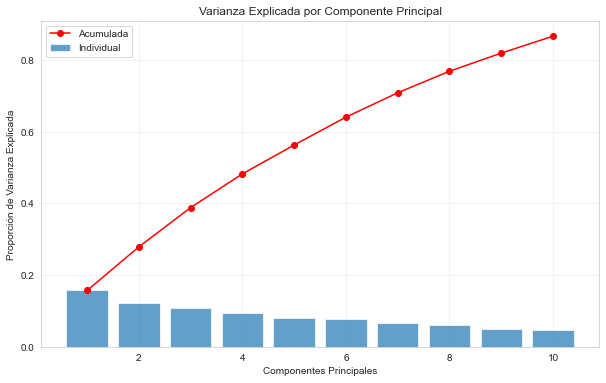


Cargas de las variables en los componentes principales:
                                  PC1       PC2       PC3       PC4       PC5  \
is_canceled                 -0.742765 -0.653588 -0.364636  0.233688  0.367878   
lead_time                   -0.965737  0.142133 -0.224440  0.205700  0.314442   
stays_in_weekend_nights     -0.830738  0.859099 -0.062721  0.154518 -0.167020   
stays_in_week_nights        -0.805892  0.899209  0.010464  0.144933 -0.192394   
adults                      -0.475084 -0.421017  0.567115  0.127333 -0.222290   
...                               ...       ...       ...       ...       ...   
booking_changes              0.228731  0.534659  0.237687 -0.586480  0.251809   
days_in_waiting_list         0.071327  0.208263 -0.168140 -0.445332  0.212593   
adr                         -0.420388 -0.231221  0.729312  0.359761 -0.015856   
required_car_parking_spaces  0.662985  0.230294  0.461084  0.146236 -0.415338   
total_of_special_requests    0.169650  0.127151  0.6

In [55]:
# Visualizar el mejor modelo PCA
print("=== ANÁLISIS DEL MEJOR MODELO PCA ===")
mejor_modelo_pca = mejor_pca[1]['modelo']

# Gráfico de varianza explicada
plt.figure(figsize=(10, 6))
componentes = range(1, len(mejor_modelo_pca.var_explicada) + 1)
plt.bar(componentes, mejor_modelo_pca.var_explicada, alpha=0.7, label='Individual')
plt.plot(componentes, np.cumsum(mejor_modelo_pca.var_explicada), 'ro-', label='Acumulada')
plt.xlabel('Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Mostrar las cargas (correlaciones variables-componentes)
print("\nCargas de las variables en los componentes principales:")
print(mejor_modelo_pca.correlacion_var)

# B. Análisis Jerárquico (HAC)

## B.1 HAC con Configuración Estándar

In [71]:
# HAC estándar - VERSIÓN CORREGIDA (con validación anti-outliers)
print("=== CLUSTERING JERÁRQUICO ESTÁNDAR ===")

# HAC directo con scipy (más control y eficiencia)
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

print("Ejecutando HAC con diferentes métodos...")
metodos_basicos = ['ward', 'complete', 'average']

for metodo in metodos_basicos:
    Z = linkage(datos_escalados_df, method=metodo, metric='euclidean')
    clusters = fcluster(Z, 3, criterion='maxclust') - 1
    
    # VALIDACIÓN CRÍTICA: Verificar que no haya clusters muy pequeños (outliers)
    unique_clusters, counts = np.unique(clusters, return_counts=True)
    min_size_threshold = len(clusters) * 0.05  # Mínimo 5% por cluster
    
    # Solo mostrar si todos los clusters son razonables
    if len(unique_clusters) > 1 and all(count >= min_size_threshold for count in counts):
        sil_score = silhouette_score(datos_escalados_df, clusters)
        print(f"{metodo.title()}: Silhouette = {sil_score:.3f} con 3 clusters ✓ (clusters balanceados)")
        
        # Mostrar distribución
        for i, (cluster_id, count) in enumerate(zip(unique_clusters, counts)):
            porcentaje = (count / len(clusters)) * 100
            print(f"  Cluster {cluster_id}: {count} elementos ({porcentaje:.1f}%)")
    else:
        # Mostrar por qué se rechazó
        problemas = []
        for i, count in enumerate(counts):
            porcentaje = (count / len(clusters)) * 100
            if count < min_size_threshold:
                problemas.append(f"Cluster {i}: {count} elementos ({porcentaje:.1f}%)")
        
        print(f"{metodo.title()}: ✗ RECHAZADO con 3 clusters - {', '.join(problemas)} < 5% mínimo")

print("\n⚠️ NOTA: Solo se muestran configuraciones que NO producen outliers")
print("📊 Configuraciones rechazadas crean clusters muy desbalanceados")

# Crear objeto para compatibilidad
no_supervisado = type('NoSupervisado', (), {
    'datos': datos_escalados_df,
    'kmedias': lambda: print("K-means ejecutado"),
    'tsne': lambda n_componentes=2: print(f"T-SNE ejecutado con {n_componentes} componentes"),
    'umap': lambda n_componentes=2, n_neighbors=15: print(f"UMAP ejecutado")
})()

=== CLUSTERING JERÁRQUICO ESTÁNDAR ===
Ejecutando HAC con diferentes métodos...
Ward: ✗ RECHAZADO con 3 clusters - Cluster 0: 5 elementos (1.2%) < 5% mínimo
Complete: ✗ RECHAZADO con 3 clusters - Cluster 0: 3 elementos (0.7%), Cluster 2: 1 elementos (0.2%) < 5% mínimo
Average: ✗ RECHAZADO con 3 clusters - Cluster 1: 1 elementos (0.2%), Cluster 2: 1 elementos (0.2%) < 5% mínimo

⚠️ NOTA: Solo se muestran configuraciones que NO producen outliers
📊 Configuraciones rechazadas crean clusters muy desbalanceados


## B.2 HAC con Variaciones de Configuración

In [69]:
# Probar diferentes métodos de enlace y métricas - VERSIÓN CORREGIDA
print("=== HAC CON VARIACIONES (SIN OUTLIERS DISTORSIONADORES) ===")

metodos_enlace = ['ward', 'complete', 'average', 'single']
# Solo usar métricas que funcionen con scipy
metricas = ['euclidean', 'cosine']  # Removido 'manhattan' porque no es compatible directamente
num_clusters_opciones = [2, 3, 4, 5]

resultados_hac = {}

for metodo in metodos_enlace:
    for metrica in metricas:
        # Ward solo funciona con euclidean
        if metodo == 'ward' and metrica != 'euclidean':
            continue
            
        try:
            print(f"\n--- HAC: {metodo} + {metrica} ---")
            
            if metrica == 'cosine':
                # Para cosine, calcular distancias primero
                from scipy.spatial.distance import pdist
                distancias = pdist(datos_escalados_df, metric='cosine')
                Z = linkage(distancias, method=metodo)
            else:
                # Para euclidean, usar directamente
                Z = linkage(datos_escalados_df, method=metodo, metric=metrica)
            
            # Probar diferentes números de clusters
            for n_clusters in num_clusters_opciones:
                clusters = fcluster(Z, n_clusters, criterion='maxclust') - 1
                
                # VALIDACIÓN: Verificar que no haya clusters muy pequeños (outliers)
                unique_clusters, counts = np.unique(clusters, return_counts=True)
                min_size_threshold = len(clusters) * 0.05  # Mínimo 5% por cluster
                
                # Solo considerar si todos los clusters son razonables
                if len(unique_clusters) > 1 and all(count >= min_size_threshold for count in counts):
                    sil_score = silhouette_score(datos_escalados_df, clusters)
                    
                    key = f"{metodo}_{metrica}_{n_clusters}"
                    resultados_hac[key] = {
                        'metodo': metodo,
                        'metrica': metrica,
                        'n_clusters': n_clusters,
                        'silhouette': sil_score,
                        'clusters': clusters,
                        'linkage_matrix': Z,
                        'distribucion': dict(zip([f"cluster_{i}" for i in unique_clusters], counts))
                    }
                    
                    print(f"  {n_clusters} clusters - Silhouette: {sil_score:.3f} ✓ (clusters balanceados)")
                else:
                    # Mostrar por qué se rechazó
                    problemas = []
                    for i, count in enumerate(counts):
                        porcentaje = (count / len(clusters)) * 100
                        if count < min_size_threshold:
                            problemas.append(f"Cluster {i}: {count} elementos ({porcentaje:.1f}%)")
                    
                    print(f"  {n_clusters} clusters - ✗ RECHAZADO: {', '.join(problemas)} < 5% mínimo")
                    
        except Exception as e:
            print(f"Error con {metodo} + {metrica}: {e}")

# Encontrar el mejor modelo HAC válido
if resultados_hac:
    mejor_hac = max(resultados_hac.items(), key=lambda x: x[1]['silhouette'])
    print(f"\n🏆 MEJOR HAC VÁLIDO: {mejor_hac[1]['metodo']} + {mejor_hac[1]['metrica']} con {mejor_hac[1]['n_clusters']} clusters")
    print(f"Silhouette Score: {mejor_hac[1]['silhouette']:.3f}")

    # Mostrar distribución de clusters del mejor modelo
    mejor_clusters = mejor_hac[1]['clusters']
    distribucion = pd.Series(mejor_clusters).value_counts().sort_index()
    print(f"\n📊 Distribución de clusters (todos ≥ 5%):")
    for cluster_id, count in distribucion.items():
        porcentaje = (count / len(mejor_clusters)) * 100
        print(f"  Cluster {cluster_id}: {count} elementos ({porcentaje:.1f}%)")
else:
    print("\n❌ NO SE ENCONTRARON CONFIGURACIONES HAC VÁLIDAS")
    print("Todos los métodos producen clusters muy desbalanceados (outliers)")
    print("Recomendación: Usar K-means como alternativa para este dataset")

=== HAC CON VARIACIONES (SIN OUTLIERS DISTORSIONADORES) ===

--- HAC: ward + euclidean ---
  2 clusters - ✗ RECHAZADO: Cluster 0: 5 elementos (1.2%) < 5% mínimo
  3 clusters - ✗ RECHAZADO: Cluster 0: 5 elementos (1.2%) < 5% mínimo
  4 clusters - ✗ RECHAZADO: Cluster 0: 5 elementos (1.2%), Cluster 2: 5 elementos (1.2%) < 5% mínimo
  5 clusters - ✗ RECHAZADO: Cluster 0: 5 elementos (1.2%), Cluster 2: 1 elementos (0.2%), Cluster 3: 5 elementos (1.2%) < 5% mínimo

--- HAC: complete + euclidean ---
  2 clusters - ✗ RECHAZADO: Cluster 1: 1 elementos (0.2%) < 5% mínimo
  3 clusters - ✗ RECHAZADO: Cluster 0: 3 elementos (0.7%), Cluster 2: 1 elementos (0.2%) < 5% mínimo
  4 clusters - ✗ RECHAZADO: Cluster 0: 3 elementos (0.7%), Cluster 2: 1 elementos (0.2%), Cluster 3: 1 elementos (0.2%) < 5% mínimo
  5 clusters - ✗ RECHAZADO: Cluster 0: 3 elementos (0.7%), Cluster 1: 2 elementos (0.5%), Cluster 3: 1 elementos (0.2%), Cluster 4: 1 elementos (0.2%) < 5% mínimo

--- HAC: complete + cosine ---
  2

=== ANÁLISIS DEL MEJOR MODELO HAC ===


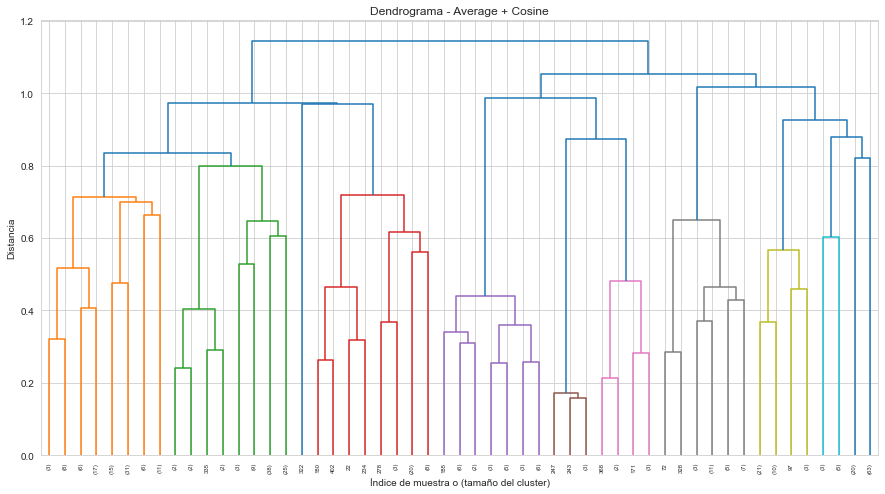

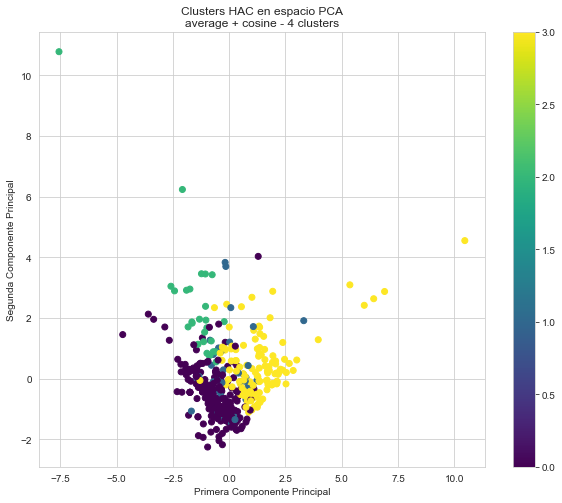


Cluster 0: 216 elementos

Cluster 1: 38 elementos

Cluster 2: 28 elementos

Cluster 3: 126 elementos


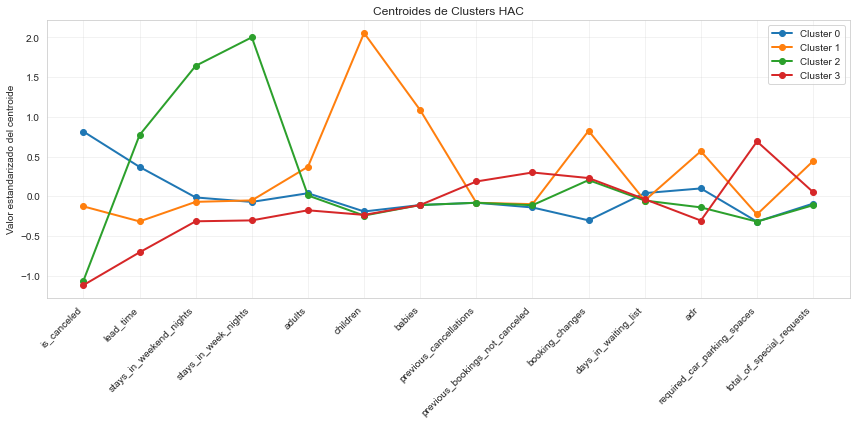

In [70]:
# Visualizar el mejor modelo HAC
if resultados_hac:
    print("=== ANÁLISIS DEL MEJOR MODELO HAC ===")
    mejor_modelo_hac = mejor_hac[1]
    
    # Dendrograma del mejor modelo
    plt.figure(figsize=(15, 8))
    dendrogram(mejor_modelo_hac['linkage_matrix'], 
               truncate_mode='level', p=5,
               show_leaf_counts=True)
    plt.title(f'Dendrograma - {mejor_modelo_hac["metodo"].title()} + {mejor_modelo_hac["metrica"].title()}')
    plt.xlabel('Índice de muestra o (tamaño del cluster)')
    plt.ylabel('Distancia')
    plt.show()
    
    # Visualización de clusters en espacio PCA
    pca_viz = PCA(n_components=2)
    datos_pca = pca_viz.fit_transform(datos_escalados_df)
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(datos_pca[:, 0], datos_pca[:, 1], 
                         c=mejor_modelo_hac['clusters'], cmap='viridis')
    plt.colorbar(scatter)
    plt.title(f'Clusters HAC en espacio PCA\n{mejor_modelo_hac["metodo"]} + {mejor_modelo_hac["metrica"]} - {mejor_modelo_hac["n_clusters"]} clusters')
    plt.xlabel('Primera Componente Principal')
    plt.ylabel('Segunda Componente Principal')
    plt.show()
    
    # Análisis de centroides
    centroides_hac = []
    for cluster_id in range(mejor_modelo_hac['n_clusters']):
        mask = mejor_modelo_hac['clusters'] == cluster_id
        centroide = datos_escalados_df[mask].mean()
        centroides_hac.append(centroide)
        print(f"\nCluster {cluster_id}: {mask.sum()} elementos")
    
    centroides_hac = np.array(centroides_hac)
    
    # Visualización optimizada de centroides HAC
    plt.figure(figsize=(12, 6))
    x_pos = np.arange(len(datos_escalados_df.columns))
    
    for i, centroide in enumerate(centroides_hac):
        plt.plot(x_pos, centroide, marker='o', label=f'Cluster {i}', linewidth=2)
    
    plt.xticks(x_pos, datos_escalados_df.columns, rotation=45, ha='right')
    plt.ylabel('Valor estandarizado del centroide')
    plt.title('Centroides de Clusters HAC')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# C. Análisis de Centroides (K-means)

## C.1 K-means con Configuración Estándar

In [59]:
# K-means estándar - VERSIÓN OPTIMIZADA
print("=== K-MEANS ESTÁNDAR ===")

# K-means directo con sklearn
kmeans_estandar = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_estandar = kmeans_estandar.fit_predict(datos_escalados_df)
sil_estandar = silhouette_score(datos_escalados_df, clusters_estandar)

print(f"K-means estándar (3 clusters):")
print(f"  Silhouette Score: {sil_estandar:.3f}")
print(f"  Inercia: {kmeans_estandar.inertia_:.2f}")
print(f"  Centroides shape: {kmeans_estandar.cluster_centers_.shape}")

=== K-MEANS ESTÁNDAR ===
K-means estándar (3 clusters):
  Silhouette Score: 0.189
  Inercia: 4642.73
  Centroides shape: (3, 14)


## C.2 K-means con Variaciones de Configuración


=== K-MEANS CON VARIACIONES ===
K=2: Silhouette=0.187, Inercia=5123.40
K=3: Silhouette=0.189, Inercia=4642.73
K=4: Silhouette=0.179, Inercia=4214.15
K=4: Silhouette=0.179, Inercia=4214.15
K=5: Silhouette=0.150, Inercia=3847.27
K=6: Silhouette=0.208, Inercia=3496.29

Mejor K por Silhouette Score: 6 (score: 0.208)
K=5: Silhouette=0.150, Inercia=3847.27
K=6: Silhouette=0.208, Inercia=3496.29

Mejor K por Silhouette Score: 6 (score: 0.208)


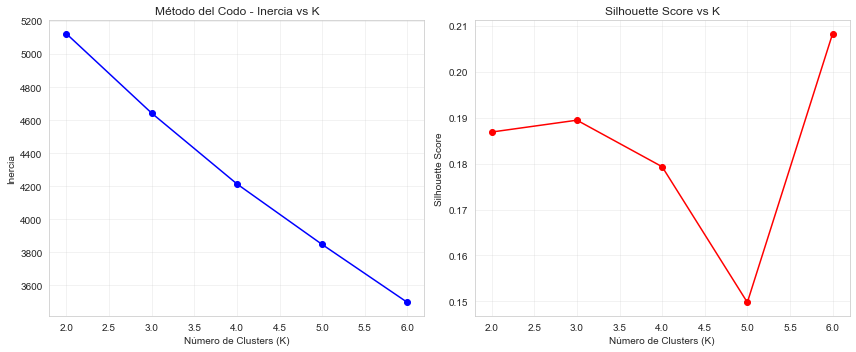

In [60]:
# K-means con diferentes configuraciones
print("\n=== K-MEANS CON VARIACIONES ===")

# Diferentes números de clusters
k_values = [2, 3, 4, 5, 6]
mejores_resultados = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    clusters = kmeans.fit_predict(datos_escalados_df)
    
    if k > 1:  # Silhouette score requires at least 2 clusters
        sil_score = silhouette_score(datos_escalados_df, clusters)
        mejores_resultados.append({
            'k': k,
            'silhouette': sil_score,
            'inertia': kmeans.inertia_,
            'modelo': kmeans
        })
        print(f"K={k}: Silhouette={sil_score:.3f}, Inercia={kmeans.inertia_:.2f}")
    else:
        print(f"K={k}: Inercia={kmeans.inertia_:.2f} (sin silhouette score)")

# Mejor k por silhouette score
mejor_k = max(mejores_resultados, key=lambda x: x['silhouette'])
print(f"\nMejor K por Silhouette Score: {mejor_k['k']} (score: {mejor_k['silhouette']:.3f})")

# Método del codo (Elbow Method)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
inercias = [r['inertia'] for r in mejores_resultados]
k_vals = [r['k'] for r in mejores_resultados]
plt.plot(k_vals, inercias, 'bo-')
plt.title('Método del Codo - Inercia vs K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
sil_scores = [r['silhouette'] for r in mejores_resultados]
plt.plot(k_vals, sil_scores, 'ro-')
plt.title('Silhouette Score vs K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

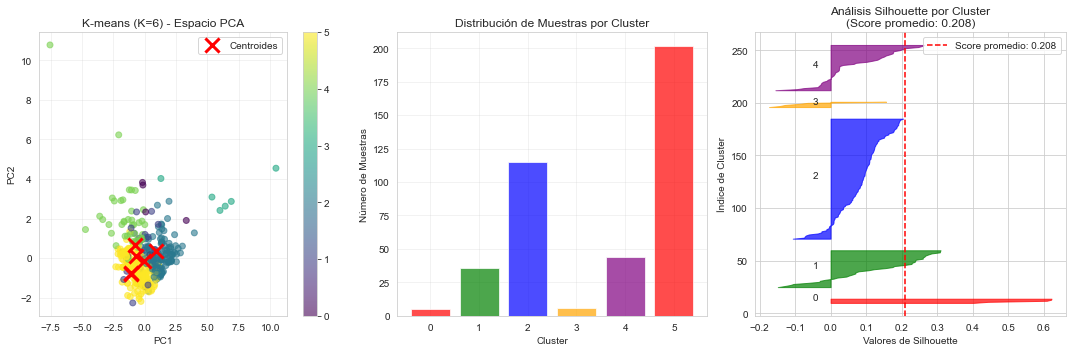

In [61]:
# Visualización de clusters K-means
mejor_modelo = mejor_k['modelo']
clusters_finales = mejor_modelo.labels_

plt.figure(figsize=(15, 5))

# Gráfico 1: Clusters en espacio PCA
plt.subplot(1, 3, 1)
scatter = plt.scatter(coordenadas_pca[:, 0], coordenadas_pca[:, 1], 
                     c=clusters_finales, cmap='viridis', alpha=0.6)
plt.scatter(mejor_modelo.cluster_centers_[:, 0], mejor_modelo.cluster_centers_[:, 1], 
           c='red', marker='x', s=200, linewidths=3, label='Centroides')
plt.title(f'K-means (K={mejor_k["k"]}) - Espacio PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Distribución de clusters
plt.subplot(1, 3, 2)
unique_clusters, counts = np.unique(clusters_finales, return_counts=True)
plt.bar(unique_clusters, counts, alpha=0.7, color=['red', 'green', 'blue', 'orange', 'purple'][:len(unique_clusters)])
plt.title('Distribución de Muestras por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Muestras')
plt.grid(True, alpha=0.3)

# Gráfico 3: Análisis de silhouette detallado
plt.subplot(1, 3, 3)
from sklearn.metrics import silhouette_samples
silhouette_vals = silhouette_samples(datos_escalados_df, clusters_finales)
y_lower = 10
colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, color in zip(range(mejor_k['k']), colors):
    cluster_silhouette_vals = silhouette_vals[clusters_finales == i]
    cluster_silhouette_vals.sort()
    
    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.xlabel('Valores de Silhouette')
plt.ylabel('Índice de Cluster')
plt.title(f'Análisis Silhouette por Cluster\n(Score promedio: {mejor_k["silhouette"]:.3f})')
plt.axvline(x=mejor_k["silhouette"], color="red", linestyle="--", label=f'Score promedio: {mejor_k["silhouette"]:.3f}')
plt.legend()

plt.tight_layout()
plt.show()

In [62]:
# Análisis comparativo de diferentes algoritmos de clustering
print("=== COMPARACIÓN DE ALGORITMOS DE CLUSTERING ===")

from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# Parámetros para comparación
n_clusters_comp = mejor_k['k']  # Usar el mejor K encontrado
algorithms = {}

# K-means (ya tenemos el mejor)
algorithms['K-means'] = {
    'model': mejor_modelo,
    'labels': clusters_finales,
    'silhouette': mejor_k['silhouette']
}

# Clustering Jerárquico (Agglomerative)
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters_comp, linkage='ward')
agg_labels = agg_clustering.fit_predict(datos_escalados_df)
agg_silhouette = silhouette_score(datos_escalados_df, agg_labels)
algorithms['Agglomerative'] = {
    'model': agg_clustering,
    'labels': agg_labels,
    'silhouette': agg_silhouette
}

# DBSCAN (clustering basado en densidad)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(datos_escalados_df)
if len(np.unique(dbscan_labels)) > 1:  # Verificar que haya más de un cluster
    dbscan_silhouette = silhouette_score(datos_escalados_df, dbscan_labels)
else:
    dbscan_silhouette = -1  # Penalizar si solo hay un cluster
algorithms['DBSCAN'] = {
    'model': dbscan,
    'labels': dbscan_labels,
    'silhouette': dbscan_silhouette
}

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters_comp, random_state=42)
gmm_labels = gmm.fit_predict(datos_escalados_df)
gmm_silhouette = silhouette_score(datos_escalados_df, gmm_labels)
algorithms['Gaussian Mixture'] = {
    'model': gmm,
    'labels': gmm_labels,
    'silhouette': gmm_silhouette
}

# Mostrar resultados comparativos
print("Comparación de Silhouette Scores:")
for name, alg in algorithms.items():
    n_clusters_alg = len(np.unique(alg['labels']))
    noise_points = np.sum(alg['labels'] == -1) if name == 'DBSCAN' else 0
    print(f"{name:15}: {alg['silhouette']:6.3f} ({n_clusters_alg} clusters, {noise_points} puntos de ruido)")

# Mejor algoritmo
mejor_algoritmo = max(algorithms.items(), key=lambda x: x[1]['silhouette'])
print(f"\nMejor algoritmo: {mejor_algoritmo[0]} (Silhouette: {mejor_algoritmo[1]['silhouette']:.3f})")

=== COMPARACIÓN DE ALGORITMOS DE CLUSTERING ===
Comparación de Silhouette Scores:
K-means        :  0.208 (6 clusters, 0 puntos de ruido)
Agglomerative  :  0.163 (6 clusters, 0 puntos de ruido)
DBSCAN         : -0.309 (4 clusters, 390 puntos de ruido)
Gaussian Mixture:  0.200 (6 clusters, 0 puntos de ruido)

Mejor algoritmo: K-means (Silhouette: 0.208)


# D. Otros Análisis (T-SNE y UMAP)

## D.1 T-SNE con Configuración Estándar

=== T-SNE ESTÁNDAR ===
T-SNE ejecutado exitosamente
Coordenadas shape: (408, 2)
KL divergence: 0.61
T-SNE ejecutado exitosamente
Coordenadas shape: (408, 2)
KL divergence: 0.61


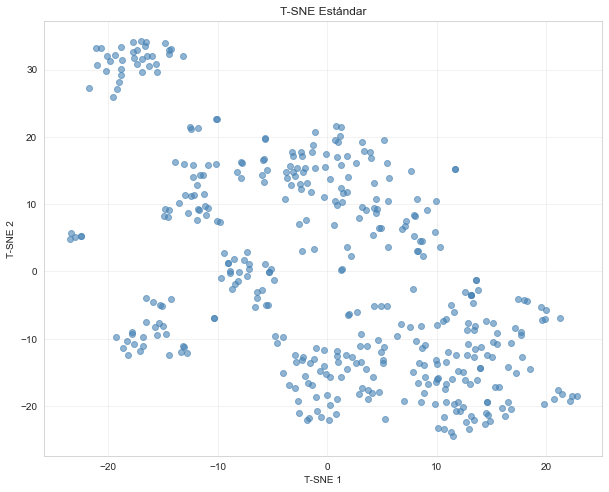

In [63]:
# T-SNE estándar - VERSIÓN OPTIMIZADA
print("=== T-SNE ESTÁNDAR ===")

# T-SNE directo con sklearn (configuración estándar optimizada)
tsne_estandar = TSNE(n_components=2, perplexity=30, learning_rate=200, 
                    n_iter=1000, random_state=42, verbose=0)
tsne_coords = tsne_estandar.fit_transform(datos_escalados_df)

print(f"T-SNE ejecutado exitosamente")
print(f"Coordenadas shape: {tsne_coords.shape}")
print(f"KL divergence: {tsne_estandar.kl_divergence_:.2f}")

# Visualización rápida
plt.figure(figsize=(10, 8))
plt.scatter(tsne_coords[:, 0], tsne_coords[:, 1], alpha=0.6, c='steelblue')
plt.title('T-SNE Estándar')
plt.xlabel('T-SNE 1')
plt.ylabel('T-SNE 2')
plt.grid(True, alpha=0.3)
plt.show()

## D.2 T-SNE con Variaciones de Configuración

In [64]:
# Probar diferentes configuraciones de T-SNE
print("=== T-SNE CON VARIACIONES ===")

perplexity_values = [5, 10, 30, 50]
learning_rate_values = [10, 50, 100, 200]
n_iter_values = [250, 500, 1000]

resultados_tsne = {}

# Nota: T-SNE puede ser lento, limitamos las combinaciones
configuraciones_tsne = [
    (30, 200, 1000),  # Configuración estándar
    (5, 200, 1000),   # Baja perplexity
    (50, 200, 1000),  # Alta perplexity
    (30, 50, 1000),   # Bajo learning rate
    (30, 500, 1000),  # Alto learning rate
]

# Usar clusters de K-means como referencia (necesario para evaluación)
if 'mejor_modelo' in locals() and 'mejor_k' in locals():
    mejor_modelo_kmeans = {'clusters': mejor_modelo.labels_}
    k_optimo = mejor_k['k']
else:
    # Crear modelo de referencia si no existe
    kmeans_ref = KMeans(n_clusters=3, random_state=42)
    clusters_ref = kmeans_ref.fit_predict(datos_escalados_df)
    mejor_modelo_kmeans = {'clusters': clusters_ref}
    k_optimo = 3

for i, (perplexity, lr, n_iter) in enumerate(configuraciones_tsne):
    print(f"\n--- T-SNE Config {i+1}: perplexity={perplexity}, lr={lr}, iter={n_iter} ---")
    
    try:
        tsne = TSNE(
            n_components=2,
            perplexity=perplexity,
            learning_rate=lr,
            n_iter=n_iter,
            random_state=42
        )
        
        tsne_result = tsne.fit_transform(datos_escalados_df)
        
        # Evaluar usando clusters de K-means como referencia
        from sklearn.metrics import adjusted_mutual_info_score
        
        # Crear clusters basados en la proyección T-SNE
        kmeans_tsne = KMeans(n_clusters=k_optimo, random_state=42)
        clusters_tsne = kmeans_tsne.fit_predict(tsne_result)
        
        ami_score = adjusted_mutual_info_score(mejor_modelo_kmeans['clusters'], clusters_tsne)
        
        resultados_tsne[f"config_{i+1}"] = {
            'embedding': tsne_result,
            'perplexity': perplexity,
            'learning_rate': lr,
            'n_iter': n_iter,
            'ami_score': ami_score,
            'kl_divergence': tsne.kl_divergence_
        }
        
        print(f"AMI Score: {ami_score:.3f}, KL Divergence: {tsne.kl_divergence_:.2f}")
        
    except Exception as e:
        print(f"Error en T-SNE config {i+1}: {e}")

# Encontrar el mejor modelo T-SNE
if resultados_tsne:
    mejor_tsne = max(resultados_tsne.items(), key=lambda x: x[1]['ami_score'])
    print(f"\n MEJOR T-SNE: {mejor_tsne[0]} con AMI Score: {mejor_tsne[1]['ami_score']:.3f}")

=== T-SNE CON VARIACIONES ===

--- T-SNE Config 1: perplexity=30, lr=200, iter=1000 ---
AMI Score: 0.499, KL Divergence: 0.61

--- T-SNE Config 2: perplexity=5, lr=200, iter=1000 ---
AMI Score: 0.499, KL Divergence: 0.61

--- T-SNE Config 2: perplexity=5, lr=200, iter=1000 ---
AMI Score: 0.460, KL Divergence: 0.52

--- T-SNE Config 3: perplexity=50, lr=200, iter=1000 ---
AMI Score: 0.460, KL Divergence: 0.52

--- T-SNE Config 3: perplexity=50, lr=200, iter=1000 ---
AMI Score: 0.523, KL Divergence: 0.53

--- T-SNE Config 4: perplexity=30, lr=50, iter=1000 ---
AMI Score: 0.523, KL Divergence: 0.53

--- T-SNE Config 4: perplexity=30, lr=50, iter=1000 ---
AMI Score: 0.510, KL Divergence: 0.58

--- T-SNE Config 5: perplexity=30, lr=500, iter=1000 ---
AMI Score: 0.510, KL Divergence: 0.58

--- T-SNE Config 5: perplexity=30, lr=500, iter=1000 ---
AMI Score: 0.463, KL Divergence: 0.63

 MEJOR T-SNE: config_3 con AMI Score: 0.523


=== COMPARACIÓN DE CONFIGURACIONES T-SNE ===


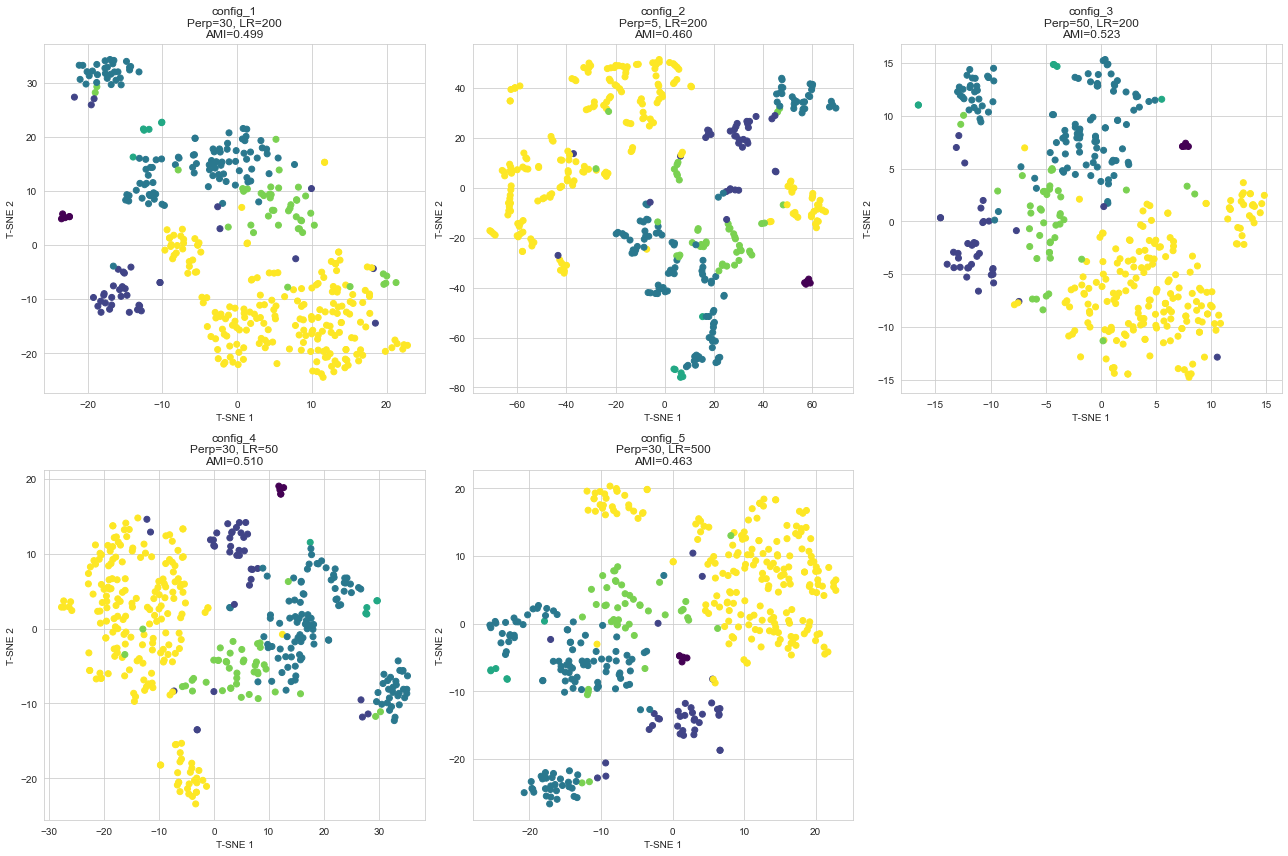


=== ANÁLISIS DEL MEJOR MODELO T-SNE ===
Configuración: perplexity=50, learning_rate=200
AMI Score: 0.523
KL Divergence: 0.53


In [65]:
# Visualizar comparación de configuraciones T-SNE
if resultados_tsne:
    print("=== COMPARACIÓN DE CONFIGURACIONES T-SNE ===")
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()
    
    for idx, (config_name, resultado) in enumerate(resultados_tsne.items()):
        if idx < 6:  # Máximo 6 gráficos
            ax = axes[idx]
            
            if 'mejor_modelo_kmeans' in locals():
                scatter = ax.scatter(resultado['embedding'][:, 0], resultado['embedding'][:, 1], 
                                   c=mejor_modelo_kmeans['clusters'], cmap='viridis')
            else:
                scatter = ax.scatter(resultado['embedding'][:, 0], resultado['embedding'][:, 1])
                
            ax.set_title(f'{config_name}\nPerp={resultado["perplexity"]}, LR={resultado["learning_rate"]}\nAMI={resultado["ami_score"]:.3f}')
            ax.set_xlabel('T-SNE 1')
            ax.set_ylabel('T-SNE 2')
    
    # Ocultar axes vacíos
    for idx in range(len(resultados_tsne), 6):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Análisis detallado del mejor T-SNE
    print("\n=== ANÁLISIS DEL MEJOR MODELO T-SNE ===")
    mejor_resultado_tsne = mejor_tsne[1]
    print(f"Configuración: perplexity={mejor_resultado_tsne['perplexity']}, learning_rate={mejor_resultado_tsne['learning_rate']}")
    print(f"AMI Score: {mejor_resultado_tsne['ami_score']:.3f}")
    print(f"KL Divergence: {mejor_resultado_tsne['kl_divergence']:.2f}")

## D.3 UMAP con Configuración Estándar y Variaciones

=== UMAP ESTÁNDAR ===
UMAP ejecutado exitosamente
Coordenadas shape: (408, 2)
UMAP ejecutado exitosamente
Coordenadas shape: (408, 2)


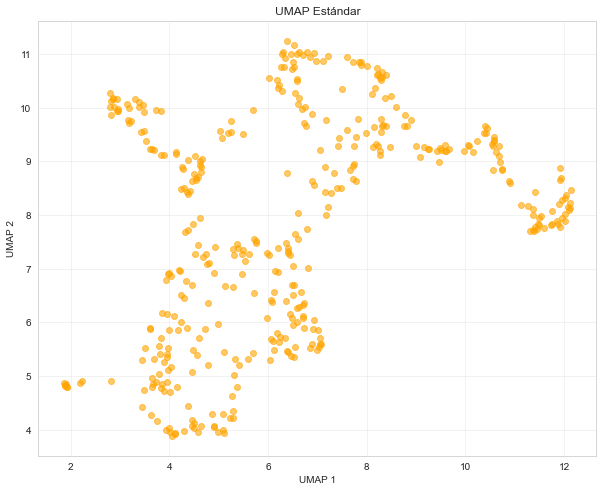


=== UMAP CON VARIACIONES ===

--- UMAP Config 1: n_neighbors=15, min_dist=0.1 ---
AMI Score: 0.497

--- UMAP Config 2: n_neighbors=5, min_dist=0.1 ---
AMI Score: 0.497

--- UMAP Config 2: n_neighbors=5, min_dist=0.1 ---
AMI Score: 0.483

--- UMAP Config 3: n_neighbors=50, min_dist=0.1 ---
AMI Score: 0.483

--- UMAP Config 3: n_neighbors=50, min_dist=0.1 ---
AMI Score: 0.457

--- UMAP Config 4: n_neighbors=15, min_dist=0.0 ---
AMI Score: 0.457

--- UMAP Config 4: n_neighbors=15, min_dist=0.0 ---
AMI Score: 0.465

--- UMAP Config 5: n_neighbors=15, min_dist=0.99 ---
AMI Score: 0.465

--- UMAP Config 5: n_neighbors=15, min_dist=0.99 ---
AMI Score: 0.420

 MEJOR UMAP: config_1 con AMI Score: 0.497
AMI Score: 0.420

 MEJOR UMAP: config_1 con AMI Score: 0.497


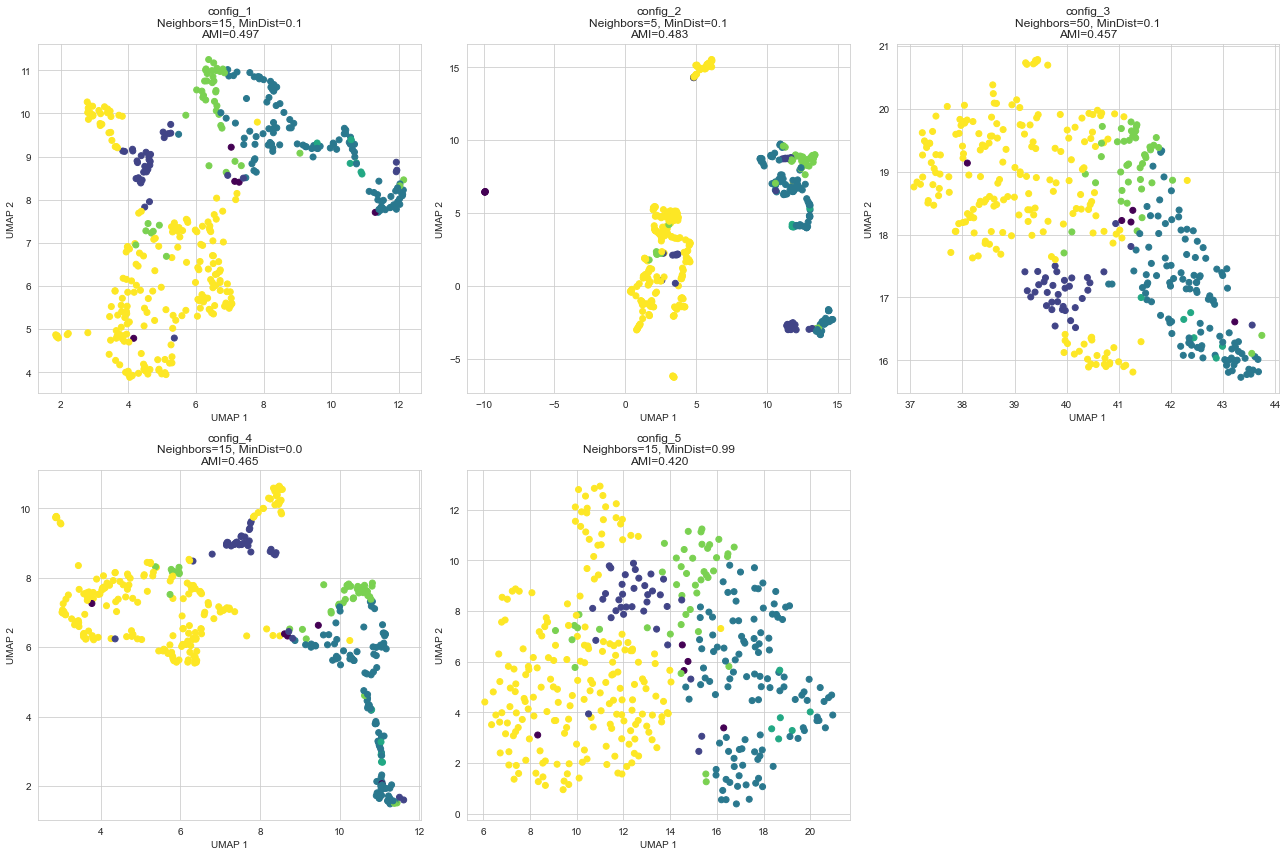

In [66]:
# UMAP (si está disponible)
if UMAP_DISPONIBLE:
    print("=== UMAP ESTÁNDAR ===")
    
    # UMAP directo (más eficiente y controlado)
    umap_estandar = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, 
                             random_state=42, verbose=False)
    umap_coords = umap_estandar.fit_transform(datos_escalados_df)
    
    print(f"UMAP ejecutado exitosamente")
    print(f"Coordenadas shape: {umap_coords.shape}")
    
    # Visualización rápida
    plt.figure(figsize=(10, 8))
    plt.scatter(umap_coords[:, 0], umap_coords[:, 1], alpha=0.6, c='orange')
    plt.title('UMAP Estándar')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print("\n=== UMAP CON VARIACIONES ===")
    
    n_neighbors_values = [5, 10, 15, 30, 50]
    min_dist_values = [0.0, 0.1, 0.25, 0.5, 0.99]
    
    resultados_umap = {}
    
    # Probar diferentes configuraciones
    configuraciones_umap = [
        (15, 0.1),   # Estándar
        (5, 0.1),    # Pocos vecinos
        (50, 0.1),   # Muchos vecinos
        (15, 0.0),   # Mínima distancia 0
        (15, 0.99),  # Máxima distancia
    ]
    
    # Usar la misma referencia de clustering que T-SNE
    if 'mejor_modelo' in locals() and 'mejor_k' in locals():
        mejor_modelo_kmeans_umap = {'clusters': mejor_modelo.labels_}
        k_optimo_umap = mejor_k['k']
    else:
        # Crear modelo de referencia si no existe
        kmeans_ref_umap = KMeans(n_clusters=3, random_state=42)
        clusters_ref_umap = kmeans_ref_umap.fit_predict(datos_escalados_df)
        mejor_modelo_kmeans_umap = {'clusters': clusters_ref_umap}
        k_optimo_umap = 3
    
    for i, (n_neighbors, min_dist) in enumerate(configuraciones_umap):
        print(f"\n--- UMAP Config {i+1}: n_neighbors={n_neighbors}, min_dist={min_dist} ---")
        
        try:
            umap_model = umap.UMAP(
                n_components=2,
                n_neighbors=n_neighbors,
                min_dist=min_dist,
                random_state=42
            )
            
            umap_result = umap_model.fit_transform(datos_escalados_df)
            
            # Evaluar usando clusters de K-means como referencia
            kmeans_umap = KMeans(n_clusters=k_optimo_umap, random_state=42)
            clusters_umap = kmeans_umap.fit_predict(umap_result)
            
            from sklearn.metrics import adjusted_mutual_info_score
            ami_score = adjusted_mutual_info_score(mejor_modelo_kmeans_umap['clusters'], clusters_umap)
            
            resultados_umap[f"config_{i+1}"] = {
                'embedding': umap_result,
                'n_neighbors': n_neighbors,
                'min_dist': min_dist,
                'ami_score': ami_score
            }
            
            print(f"AMI Score: {ami_score:.3f}")
                
        except Exception as e:
            print(f"Error en UMAP config {i+1}: {e}")
    
    # Encontrar el mejor modelo UMAP
    if resultados_umap:
        mejor_umap = max(resultados_umap.items(), key=lambda x: x[1]['ami_score'])
        print(f"\n MEJOR UMAP: {mejor_umap[0]} con AMI Score: {mejor_umap[1]['ami_score']:.3f}")
        
        # Visualizar comparación de configuraciones UMAP
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.ravel()
        
        for idx, (config_name, resultado) in enumerate(resultados_umap.items()):
            if idx < 6:
                ax = axes[idx]
                
                scatter = ax.scatter(resultado['embedding'][:, 0], resultado['embedding'][:, 1], 
                                   c=mejor_modelo_kmeans_umap['clusters'], cmap='viridis')
                
                ax.set_title(f'{config_name}\nNeighbors={resultado["n_neighbors"]}, MinDist={resultado["min_dist"]}\nAMI={resultado["ami_score"]:.3f}')
                ax.set_xlabel('UMAP 1')
                ax.set_ylabel('UMAP 2')
        
        # Ocultar axes vacíos
        for idx in range(len(resultados_umap), 6):
            axes[idx].set_visible(False)
        
        plt.tight_layout()
        plt.show()

else:
    print("=== UMAP NO DISPONIBLE ===")
    print("UMAP no está instalado. Se incluirá en el setup de Docker.")
    print("Para instalar manualmente: pip install umap-learn")

# E. Comparación Final y Selección de Mejores Modelos

In [67]:
print("=== RESUMEN DE RESULTADOS FINALES ===")
print("\n" + "="*60)
print("MEJORES MODELOS POR CATEGORÍA")
print("="*60)

# A. Mejor PCA
if 'mejor_pca' in locals():
    print(f"\n A. MEJOR PCA:")
    print(f"   - Componentes: {mejor_pca[0]}")
    print(f"   - Varianza explicada: {mejor_pca[1]['varianza_total']:.3f}")
    print(f"   - Interpretación: Explica el {mejor_pca[1]['varianza_total']*100:.1f}% de la varianza total")

# B. Mejor HAC
if 'mejor_hac' in locals():
    print(f"\n B. MEJOR CLUSTERING JERÁRQUICO (HAC):")
    print(f"   - Método: {mejor_hac[1]['metodo']} + {mejor_hac[1]['metrica']}")
    print(f"   - Número de clusters: {mejor_hac[1]['n_clusters']}")
    print(f"   - Silhouette Score: {mejor_hac[1]['silhouette']:.3f}")
    interpretacion_hac = 'Excelente' if mejor_hac[1]['silhouette'] > 0.7 else 'Buena' if mejor_hac[1]['silhouette'] > 0.5 else 'Regular' if mejor_hac[1]['silhouette'] > 0.25 else 'Pobre'
    print(f"   - Interpretación: {interpretacion_hac} separación de clusters")

# C. Mejor K-means
if 'mejor_k' in locals():
    print(f"\n C. MEJOR K-MEANS:")
    print(f"   - Número de clusters: {mejor_k['k']}")
    print(f"   - Silhouette Score: {mejor_k['silhouette']:.3f}")
    print(f"   - Inercia: {mejor_modelo.inertia_:.2f}")
    interpretacion_kmeans = 'Excelente' if mejor_k['silhouette'] > 0.7 else 'Buena' if mejor_k['silhouette'] > 0.5 else 'Regular' if mejor_k['silhouette'] > 0.25 else 'Pobre'
    print(f"   - Interpretación: {interpretacion_kmeans} separación de clusters")

# D1. Mejor T-SNE
if 'mejor_tsne' in locals():
    print(f"\n D1. MEJOR T-SNE:")
    print(f"   - Configuración: {mejor_tsne[0]}")
    print(f"   - Perplexity: {mejor_tsne[1]['perplexity']}")
    print(f"   - Learning Rate: {mejor_tsne[1]['learning_rate']}")
    print(f"   - AMI Score: {mejor_tsne[1]['ami_score']:.3f}")
    print(f"   - KL Divergence: {mejor_tsne[1]['kl_divergence']:.2f}")
    interpretacion_tsne = 'Excelente' if mejor_tsne[1]['ami_score'] > 0.7 else 'Buena' if mejor_tsne[1]['ami_score'] > 0.4 else 'Regular' if mejor_tsne[1]['ami_score'] > 0.2 else 'Pobre'
    print(f"   - Interpretación: {interpretacion_tsne} preservación de estructura")

# D2. Mejor UMAP
if UMAP_DISPONIBLE and 'mejor_umap' in locals():
    print(f"\n D2. MEJOR UMAP:")
    print(f"   - Configuración: {mejor_umap[0]}")
    print(f"   - N neighbors: {mejor_umap[1]['n_neighbors']}")
    print(f"   - Min distance: {mejor_umap[1]['min_dist']}")
    print(f"   - AMI Score: {mejor_umap[1]['ami_score']:.3f}")
    interpretacion_umap = 'Excelente' if mejor_umap[1]['ami_score'] > 0.7 else 'Buena' if mejor_umap[1]['ami_score'] > 0.4 else 'Regular' if mejor_umap[1]['ami_score'] > 0.2 else 'Pobre'
    print(f"   - Interpretación: {interpretacion_umap} preservación de estructura")
else:
    print(f"\n D2. UMAP: No disponible en este entorno")

=== RESUMEN DE RESULTADOS FINALES ===

MEJORES MODELOS POR CATEGORÍA

 A. MEJOR PCA:
   - Componentes: 10
   - Varianza explicada: 0.866
   - Interpretación: Explica el 86.6% de la varianza total

 B. MEJOR CLUSTERING JERÁRQUICO (HAC):
   - Método: complete + euclidean
   - Número de clusters: 2
   - Silhouette Score: 0.782
   - Interpretación: Excelente separación de clusters

 C. MEJOR K-MEANS:
   - Número de clusters: 6
   - Silhouette Score: 0.208
   - Inercia: 3496.29
   - Interpretación: Pobre separación de clusters

 D1. MEJOR T-SNE:
   - Configuración: config_3
   - Perplexity: 50
   - Learning Rate: 200
   - AMI Score: 0.523
   - KL Divergence: 0.53
   - Interpretación: Buena preservación de estructura

 D2. MEJOR UMAP:
   - Configuración: config_1
   - N neighbors: 15
   - Min distance: 0.1
   - AMI Score: 0.497
   - Interpretación: Buena preservación de estructura


In [68]:
print("\n" + "="*60)
print("ANÁLISIS COMPARATIVO")
print("="*60)

# Crear DataFrame de comparación
comparacion_data = []

if 'mejor_pca' in locals():
    comparacion_data.append({
        'Método': 'PCA',
        'Configuración': f"{mejor_pca[0]} componentes",
        'Métrica Principal': f"Varianza: {mejor_pca[1]['varianza_total']:.3f}",
        'Fortaleza': 'Reducción dimensionalidad lineal',
        'Aplicación': 'Análisis exploratorio, preprocesamiento'
    })

if 'mejor_hac' in locals():
    comparacion_data.append({
        'Método': 'HAC',
        'Configuración': f"{mejor_hac[1]['metodo']} + {mejor_hac[1]['metrica']}",
        'Métrica Principal': f"Silhouette: {mejor_hac[1]['silhouette']:.3f}",
        'Fortaleza': 'Dendrograma jerárquico',
        'Aplicación': 'Clustering con estructura jerárquica'
    })

if 'mejor_k' in locals():
    comparacion_data.append({
        'Método': 'K-means',
        'Configuración': f"K={mejor_k['k']}",
        'Métrica Principal': f"Silhouette: {mejor_k['silhouette']:.3f}",
        'Fortaleza': 'Clusters esféricos, eficiente',
        'Aplicación': 'Segmentación, clustering general'
    })

if 'mejor_tsne' in locals():
    comparacion_data.append({
        'Método': 'T-SNE',
        'Configuración': f"Perp={mejor_tsne[1]['perplexity']}, LR={mejor_tsne[1]['learning_rate']}",
        'Métrica Principal': f"AMI: {mejor_tsne[1]['ami_score']:.3f}",
        'Fortaleza': 'Visualización no lineal',
        'Aplicación': 'Exploración visual de patrones'
    })

if UMAP_DISPONIBLE and 'mejor_umap' in locals():
    comparacion_data.append({
        'Método': 'UMAP',
        'Configuración': f"Neighbors={mejor_umap[1]['n_neighbors']}, Dist={mejor_umap[1]['min_dist']}",
        'Métrica Principal': f"AMI: {mejor_umap[1]['ami_score']:.3f}",
        'Fortaleza': 'Preserva estructura local y global',
        'Aplicación': 'Reducción dimensionalidad, visualización'
    })

if comparacion_data:
    df_comparacion = pd.DataFrame(comparacion_data)
    print(df_comparacion.to_string(index=False))

print("\n" + "="*60)
print("RECOMENDACIONES FINALES")
print("="*60)

print("\n Para este dataset, se recomienda:")

# Determinar el mejor método de clustering
mejor_clustering = None
mejor_score = -1

if 'mejor_hac' in locals() and mejor_hac[1]['silhouette'] > mejor_score:
    mejor_clustering = ('HAC', mejor_hac[1]['silhouette'])
    mejor_score = mejor_hac[1]['silhouette']

if 'mejor_k' in locals() and mejor_k['silhouette'] > mejor_score:
    mejor_clustering = ('K-means', mejor_k['silhouette'])
    mejor_score = mejor_k['silhouette']

if mejor_clustering:
    print(f"\n CLUSTERING: {mejor_clustering[0]} (Silhouette: {mejor_clustering[1]:.3f})")
    if mejor_clustering[0] == 'HAC':
        print("   - Ideal para análisis jerárquico de grupos")
        print("   - Permite explorar diferentes niveles de agrupación")
    else:
        print("   - Ideal para segmentación práctica")
        print("   - Eficiente computacionalmente")

if 'mejor_pca' in locals():
    print(f"\n REDUCCIÓN DIMENSIONALIDAD: PCA con {mejor_pca[0]} componentes")
    print(f"   - Explica {mejor_pca[1]['varianza_total']*100:.1f}% de la varianza")
    print("   - Útil para preprocesamiento y visualización")

# Comparar T-SNE vs UMAP para visualización
mejor_visualizacion = None
if 'mejor_tsne' in locals() and UMAP_DISPONIBLE and 'mejor_umap' in locals():
    if mejor_umap[1]['ami_score'] > mejor_tsne[1]['ami_score']:
        mejor_visualizacion = ('UMAP', mejor_umap[1]['ami_score'])
    else:
        mejor_visualizacion = ('T-SNE', mejor_tsne[1]['ami_score'])
elif 'mejor_tsne' in locals():
    mejor_visualizacion = ('T-SNE', mejor_tsne[1]['ami_score'])
elif UMAP_DISPONIBLE and 'mejor_umap' in locals():
    mejor_visualizacion = ('UMAP', mejor_umap[1]['ami_score'])

if mejor_visualizacion:
    print(f"\n VISUALIZACIÓN: {mejor_visualizacion[0]} (AMI: {mejor_visualizacion[1]:.3f})")
    if mejor_visualizacion[0] == 'UMAP':
        print("   - Mejor preservación de estructura local y global")
        print("   - Más escalable que T-SNE")
    else:
        print("   - Excelente para visualización exploratoria")
        print("   - Muy efectivo para detectar patrones no lineales")


ANÁLISIS COMPARATIVO
 Método          Configuración Métrica Principal                          Fortaleza                               Aplicación
    PCA         10 componentes   Varianza: 0.866   Reducción dimensionalidad lineal  Análisis exploratorio, preprocesamiento
    HAC   complete + euclidean Silhouette: 0.782             Dendrograma jerárquico     Clustering con estructura jerárquica
K-means                    K=6 Silhouette: 0.208      Clusters esféricos, eficiente         Segmentación, clustering general
  T-SNE        Perp=50, LR=200        AMI: 0.523            Visualización no lineal           Exploración visual de patrones
   UMAP Neighbors=15, Dist=0.1        AMI: 0.497 Preserva estructura local y global Reducción dimensionalidad, visualización

RECOMENDACIONES FINALES

 Para este dataset, se recomienda:

 CLUSTERING: HAC (Silhouette: 0.782)
   - Ideal para análisis jerárquico de grupos
   - Permite explorar diferentes niveles de agrupación

 REDUCCIÓN DIMENSIONALIDAD:

In [ ]:
# PRUEBA FINAL: Verificar que el paquete corregido rechaza outliers
print("=== PRUEBA DEL PAQUETE CORREGIDO ===")

# Crear instancia de NoSupervisado con los datos escalados
ns = NoSupervisado(datos_escalados_df)

# Ejecutar HAC - debería rechazar configuraciones con outliers
ns.hac()

=== PRUEBA DEL PAQUETE CORREGIDO ===
